In [2]:
import os
import torch

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from pathlib import Path

In [3]:
def plot_MI_planes(MI_X_L: dict, MI_L_Y: dict, filtered_MI_X_L: dict=None, filtered_MI_L_Y: dict=None,
                   n_columns: int=3) -> None:
    """
    Plot information plane data for each layer in a subplot.
    
    Parameters
    ----------
    MI_X_L : dict
        Raw I(X;L) data (with errorbars).
    MI_L_Y : dict
        Raw I(L;Y) data (with errorbars).
    filtered_MI_X_L : dict
        Filtered I(X;L) data.
    filtered_MI_L_Y : dict
        Filtered I(L;Y) data.
    """
    
    assert len(MI_X_L) == len(MI_L_Y)
    
    filtered_provided = (not filtered_MI_X_L is None) and (not filtered_MI_L_Y is None)
    
    # Number of rows.
    n_rows = len(MI_X_L) // n_columns + (len(MI_X_L) % n_columns != 0)
    
    width = 6
    height = 4
    fig, ax = plt.subplots(n_rows, n_columns, figsize=(width * n_columns, height * n_rows))
    for index, layer_name in enumerate(MI_X_L.keys()):
        row_index = index // n_columns
        column_index = index % n_columns
        subplot_ax = ax[row_index, column_index]
        
        subplot_ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
        subplot_ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
        subplot_ax.set_title(str(layer_name))
        
        x =     [item[0] for item in MI_X_L[layer_name]]
        x_err = [item[1] for item in MI_X_L[layer_name]]
        y =     [item[0] for item in MI_L_Y[layer_name]]
        y_err = [item[1] for item in MI_L_Y[layer_name]]
        
        if filtered_provided:
            subplot_ax.errorbar(x, y, x_err, y_err, ls='none', solid_capstyle='projecting', capsize=3, alpha=0.25, color='lightblue')
            subplot_ax.plot(filtered_MI_X_L[layer_name], filtered_MI_L_Y[layer_name], color='red')
        else:
            subplot_ax.plot(x, y)
            #subplot_ax.scatter(x, y, cmap=list(range(len(x))))
            
    plt.show();

# Load data

In [6]:
data = pd.DataFrame()

data_path = r"runs/default.csv"
prefix_col = 'denim-thunder-6 - '
# Test MI
data['step'] = pd.read_csv(data_path)['Step']
data['mi_x_1'] = pd.read_csv(data_path)[f'{prefix_col}MI(X;L)_eval/layer 1']
data['mi_x_2'] = pd.read_csv(data_path)[f'{prefix_col}MI(X;L)_eval/layer 2']
data['mi_x_3'] = pd.read_csv(data_path)[f'{prefix_col}MI(X;L)_eval/layer 3']
data['mi_y_1'] = pd.read_csv(data_path)[f'{prefix_col}MI(L;Y)_eval/layer 1']
data['mi_y_2'] = pd.read_csv(data_path)[f'{prefix_col}MI(L;Y)_eval/layer 2']
data['mi_y_3'] = pd.read_csv(data_path)[f'{prefix_col}MI(L;Y)_eval/layer 3']
# Train MI
data['train_mi_x_1'] = pd.read_csv(data_path)[f'{prefix_col}MI(X;L)_train/layer 1']
data['train_mi_x_2'] = pd.read_csv(data_path)[f'{prefix_col}MI(X;L)_train/layer 2']
data['train_mi_x_3'] = pd.read_csv(data_path)[f'{prefix_col}MI(X;L)_train/layer 3']
data['train_mi_y_1'] = pd.read_csv(data_path)[f'{prefix_col}MI(L;Y)_train/layer 1']
data['train_mi_y_2'] = pd.read_csv(data_path)[f'{prefix_col}MI(L;Y)_train/layer 2']
data['train_mi_y_3'] = pd.read_csv(data_path)[f'{prefix_col}MI(L;Y)_train/layer 3']
# Accuracy and weight norm
data['acc_test'] = pd.read_csv(data_path)[f'{prefix_col}Acc/test']
data['acc_train'] = pd.read_csv(data_path)[f'{prefix_col}Acc/train']
data['wn'] = pd.read_csv(data_path)[f'{prefix_col}WN/total']
data['wn1'] = pd.read_csv(data_path)[f'{prefix_col}WN/linear_1']
data['wn2'] = pd.read_csv(data_path)[f'{prefix_col}WN/linear_2']
data['wn3'] = pd.read_csv(data_path)[f'{prefix_col}WN/linear_3']

In [7]:
data

,step,mi_x_1,mi_x_2,mi_x_3,mi_y_1,mi_y_2,mi_y_3,train_mi_x_1,train_mi_x_2,train_mi_x_3,train_mi_y_1,train_mi_y_2,train_mi_y_3,acc_test,acc_train,wn,wn1,wn2,wn3
0,0,2.490720,2.042081,0.331597,1.444541,1.359073,0.753609,2.539668,1.647356,0.407864,1.557878,1.330269,0.800630,0.0973,0.095,145.844827,65.324292,65.651803,14.868732
1,1,2.500670,2.040749,0.374634,1.440689,1.350246,0.732477,2.235319,1.705378,0.249781,1.551014,1.306397,0.765010,0.0890,0.088,145.836970,65.321157,65.651037,14.864776
2,2,2.493556,1.989119,0.371946,1.441895,1.342518,0.708501,1.937455,1.728128,0.392018,1.518768,1.335190,0.737285,0.0858,0.077,145.829666,65.318709,65.650464,14.860493
3,3,2.536246,1.943030,0.390523,1.438744,1.315340,0.661915,1.824314,1.656970,0.210315,1.488718,1.342321,0.600933,0.0850,0.087,145.821273,65.316672,65.649062,14.855540
4,4,2.543227,1.873994,0.178204,1.434407,1.313402,0.611249,1.753141,1.538450,-0.262194,1.479926,1.351559,0.542588,0.0943,0.089,145.810974,65.314384,65.646641,14.849949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,95000,2.830743,0.473014,1.490984,1.799815,2.046662,1.957261,3.114112,-5.244089,-0.946577,1.931804,3.793140,2.308856,0.8806,1.000,69.072091,39.636523,28.649145,0.786423
125,96000,2.865417,0.331157,1.490086,1.811104,2.023625,1.942036,3.329028,-5.365384,-1.313271,1.936054,3.571353,2.321247,0.8790,1.000,68.752852,39.489006,28.491021,0.772825
126,97000,2.826109,-0.081639,1.233373,1.819952,2.096255,1.939936,3.367820,-5.081382,-0.923807,1.958941,3.574521,2.385275,0.8813,1.000,68.645799,39.429114,28.415558,0.801128
127,98000,2.814320,-0.090250,1.433058,1.813803,2.047185,1.936893,3.175429,-5.403532,-0.914192,1.912635,3.463474,2.307959,0.8829,1.000,68.897563,39.784048,28.338722,0.774792


# Plot


## Information Plane for Eval data

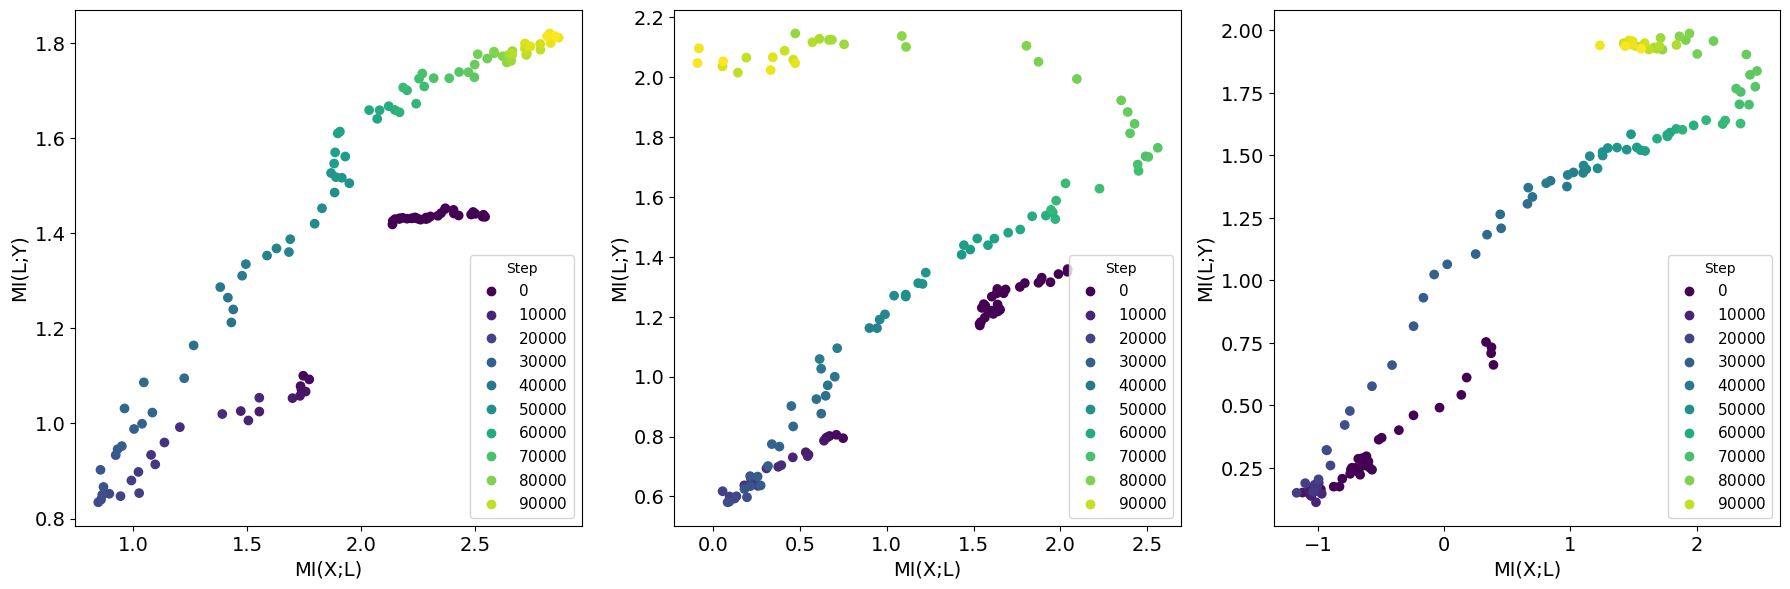

In [138]:
fig, axs2d = plt.subplots(1, 3, figsize=(18,6))

axs_rav = np.ravel(axs2d)

scat0 = axs_rav[0].scatter(data['mi_x_1'].values, data['mi_y_1'].values, c=data['step'].values)
legend2 = axs_rav[0].legend(*np.array(scat0.legend_elements()), loc="lower right", title="Step", fontsize=11)

scat1 = axs_rav[1].scatter(data['mi_x_2'].values, data['mi_y_2'].values, c=data['step'].values)
legend2 = axs_rav[1].legend(*np.array(scat1.legend_elements()), loc="lower right", title="Step", fontsize=11)

scat2 = axs_rav[2].scatter(data['mi_x_3'].values, data['mi_y_3'].values, c=data['step'].values)
legend2 = axs_rav[2].legend(*np.array(scat2.legend_elements()), loc="lower right", title="Step", fontsize=11)

for i in range(3):
    axs_rav[i].tick_params(axis='both', which='major', labelsize=14)
    axs_rav[i].set_xlabel("MI(X;L)", fontsize=14)
    axs_rav[i].set_ylabel("MI(L;Y)", fontsize=14)

# # xlim and ylim
# for ax_ in axs_rav:
#     ax_.set_xlim(-1.5, 3)
#     ax_.set_ylim(0, 2.5)

plt.tight_layout()
plt.show()

## Information Plane for Train data

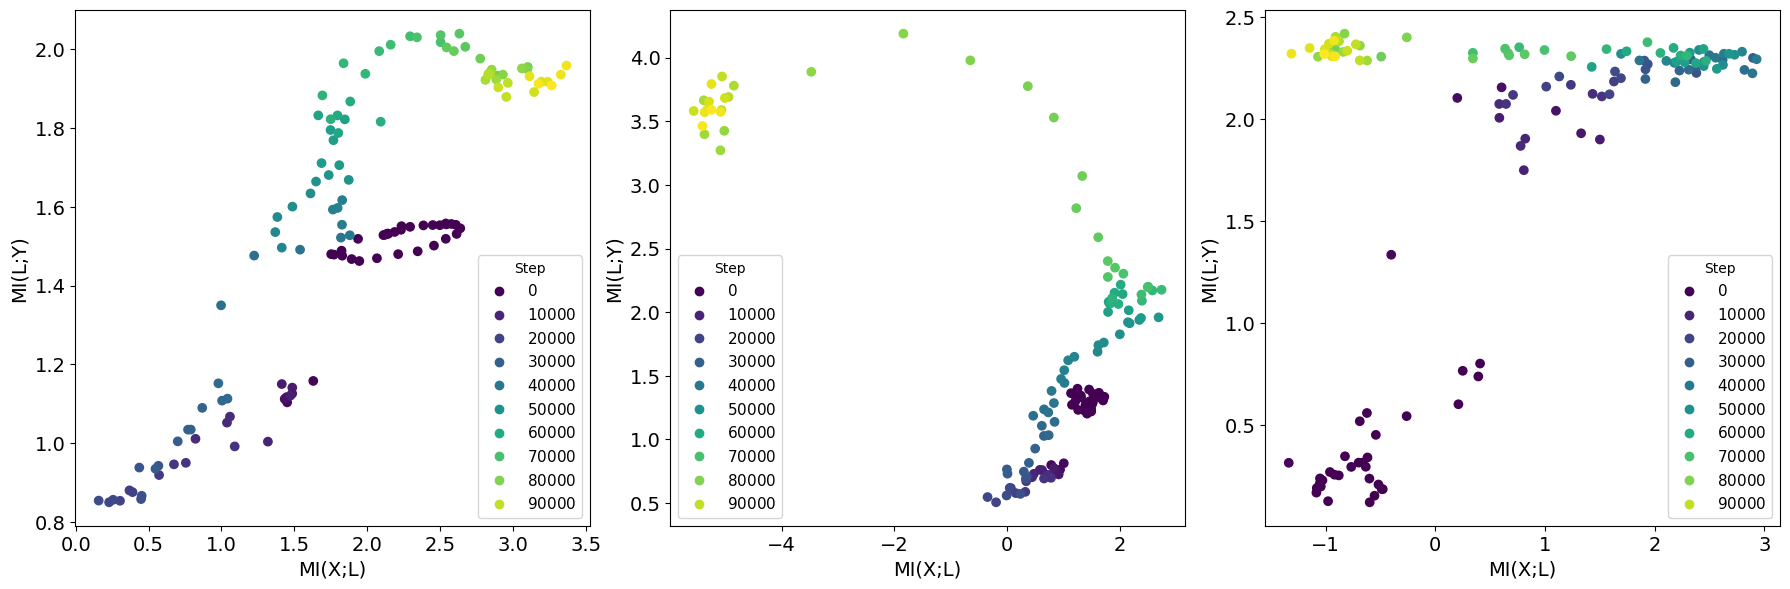

In [136]:
fig, axs2d = plt.subplots(1, 3, figsize=(18,6), )

axs_rav = np.ravel(axs2d)

scat0 = axs_rav[0].scatter(data['train_mi_x_1'].values, data['train_mi_y_1'].values, c=data['step'].values)
legend2 = axs_rav[0].legend(*np.array(scat0.legend_elements()), loc="lower right", title="Step", fontsize=11)

scat1 = axs_rav[1].scatter(data['train_mi_x_2'].values, data['train_mi_y_2'].values, c=data['step'].values)
legend2 = axs_rav[1].legend(*np.array(scat1.legend_elements()), loc="lower left", title="Step", fontsize=11)

scat2 = axs_rav[2].scatter(data['train_mi_x_3'].values, data['train_mi_y_3'].values, c=data['step'].values)
legend2 = axs_rav[2].legend(*np.array(scat2.legend_elements()), loc="lower right", title="Step", fontsize=11)

for i in range(3):
    axs_rav[i].tick_params(axis='both', which='major', labelsize=14)
    axs_rav[i].set_xlabel("MI(X;L)", fontsize=14)
    axs_rav[i].set_ylabel("MI(L;Y)", fontsize=14)

# # xlim and ylim
# for ax_ in axs_rav:
#     ax_.set_xlim(-6, )
#     ax_.set_ylim(0, 5)

plt.tight_layout()
plt.show()

## Equal limits

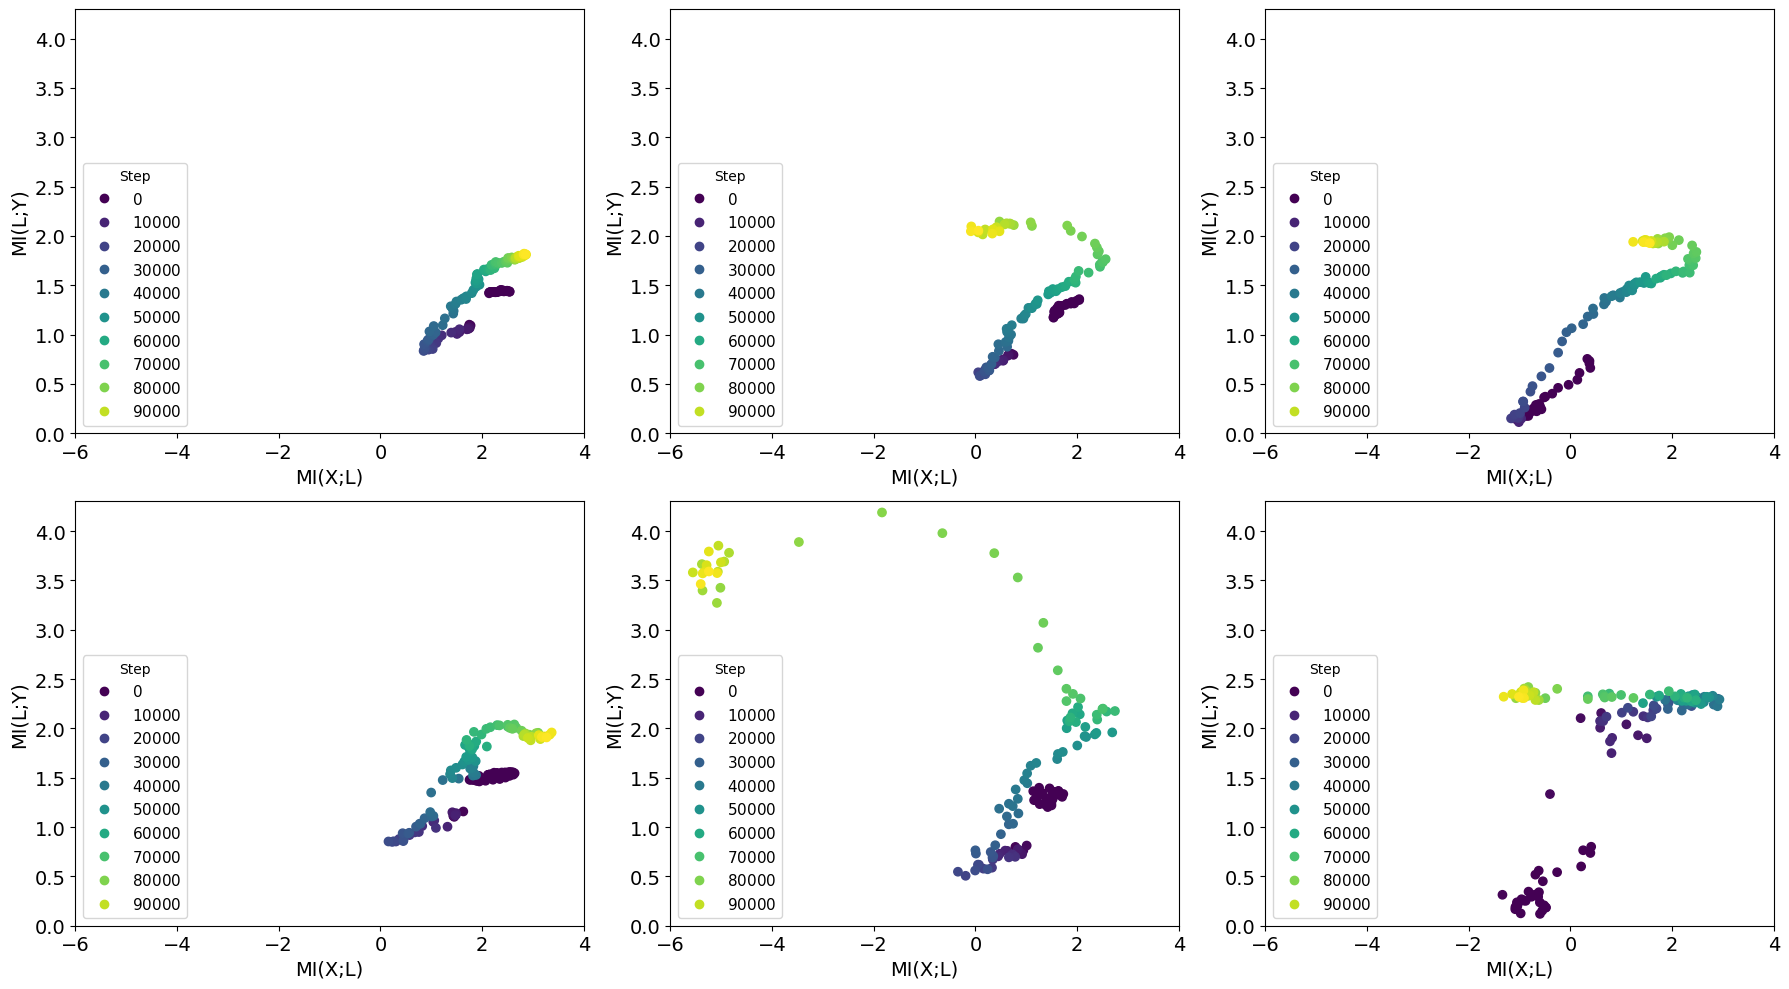

In [143]:
fig, axs2d = plt.subplots(2, 3, figsize=(18,10))

axs_rav = np.ravel(axs2d)

for i in range(3):
    scat0 = axs_rav[i].scatter(data[f'mi_x_{i+1}'].values, data[f'mi_y_{i+1}'].values, c=data['step'].values)
    axs_rav[i].legend(*np.array(scat0.legend_elements()), loc="lower left", title="Step", fontsize=11)
    
    scat0 = axs_rav[i+3].scatter(data[f'train_mi_x_{i+1}'].values, data[f'train_mi_y_{i+1}'].values, c=data['step'].values)
    axs_rav[i+3].legend(*np.array(scat0.legend_elements()), loc="lower left", title="Step", fontsize=11)

for i in range(6):
    axs_rav[i].tick_params(axis='both', which='major', labelsize=14)
    axs_rav[i].set_xlabel("MI(X;L)", fontsize=14)
    axs_rav[i].set_ylabel("MI(L;Y)", fontsize=14)

# xlim and ylim
for ax_ in axs_rav:
    ax_.set_xlim(-6, 4)
    ax_.set_ylim(0, 4.3)

plt.tight_layout()
plt.show()

## Accuracy and WN

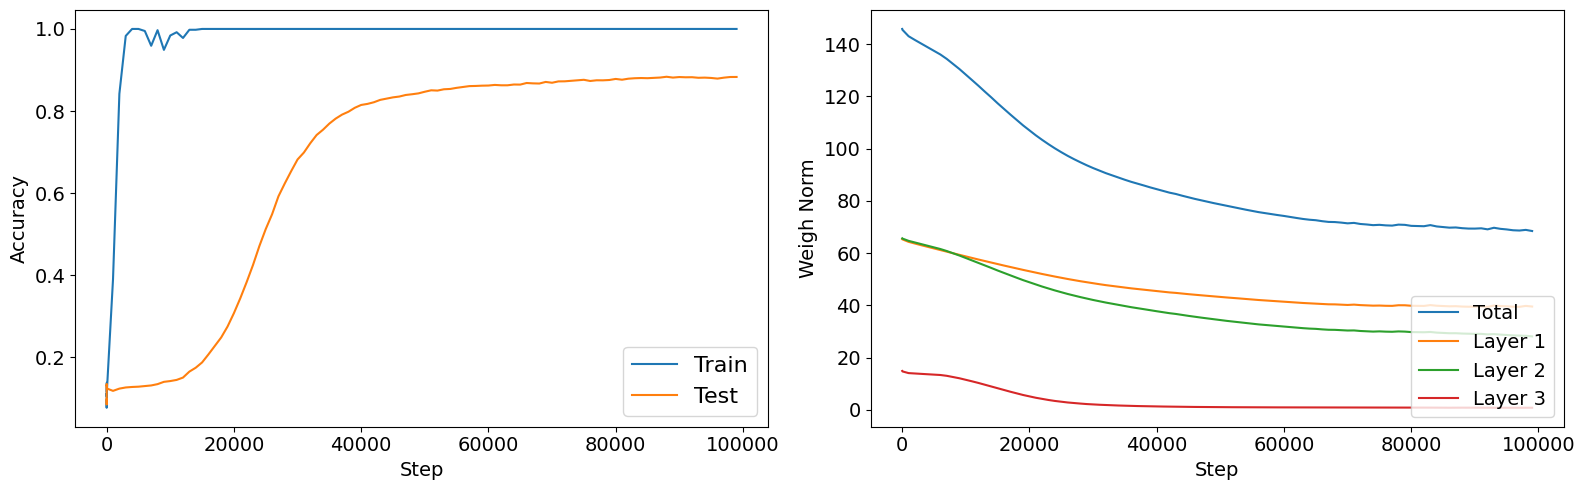

In [15]:
fig, axs2d = plt.subplots(1, 2, figsize=(16,5), )
axs_rav = np.ravel(axs2d)

sns.lineplot(
    data=data, 
    x=f"step", 
    y=f"acc_train",
    ax=axs_rav[0],
    label='Train'
)
sns.lineplot(
    data=data, 
    x=f"step", 
    y=f"acc_test",
    ax=axs_rav[0],
    label='Test'
)
axs_rav[0].legend(loc='lower right', fontsize=16)
axs_rav[0].tick_params(axis='both', which='major', labelsize=14)
axs_rav[0].set_xlabel("Step", fontsize=14)
axs_rav[0].set_ylabel("Accuracy", fontsize=14)
# axs_rav[0].set_xscale('log')

sns.lineplot(
    data=data, 
    x=f"step", 
    y=f"wn",
    ax=axs_rav[1],
    label='Total'
)
for i in range(1, 4):
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"wn{i}",
        ax=axs_rav[1],
        label=f'Layer {i}'
    )
axs_rav[1].tick_params(axis='both', which='major', labelsize=14)
axs_rav[1].set_xlabel("Step", fontsize=14)
axs_rav[1].set_ylabel("Weigh Norm", fontsize=14)
axs_rav[1].legend(loc='lower right', fontsize=14)
# axs_rav[1].set_xscale('log')

plt.tight_layout()
plt.show()

## Test Accuracy and MI 

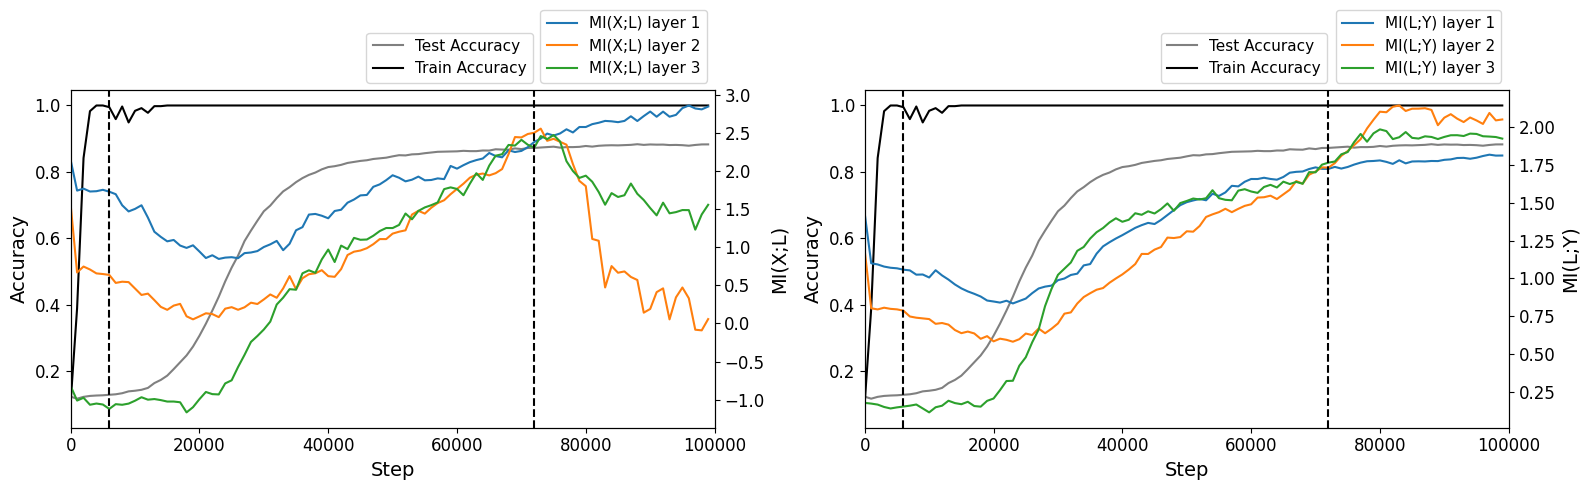

In [96]:
fig, axs2d = plt.subplots(1, 2, figsize=(16,5), )
axs_rav = np.ravel(axs2d)
vlinex_list = (6_000, 72_000)
legend_size = 11
tick_size = 12
label_size = 14
# ---------
# Accuracy
for i in range(2):
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"acc_test",
        ax=axs_rav[i],
        color='grey',
        label='Test Accuracy'
    )
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"acc_train",
        ax=axs_rav[i],
        color='black',
        label='Train Accuracy'
    )
# -----------
# MI(X;L)
ax0 = axs_rav[0].twinx()
for i in range(1,4):
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"mi_x_{i}",
        ax=ax0,
        label=f'MI(X;L) layer {i}'
    )
# legend
axs_rav[0].legend(loc='lower right', fontsize=legend_size, bbox_to_anchor=(0.73, 1))
ax0.legend(loc='lower right', fontsize=legend_size, bbox_to_anchor=(1, 1))
# tick
axs_rav[0].tick_params(axis='both', which='major', labelsize=tick_size)
ax0.tick_params(axis='both', which='major', labelsize=tick_size)
# label
axs_rav[0].set_xlabel("Step", fontsize=label_size)
axs_rav[0].set_ylabel("Accuracy", fontsize=label_size)
ax0.set_ylabel("MI(X;L)", fontsize=label_size)
# xlim
axs_rav[0].set_xlim(0, 100_000)
# axs_rav[0].set_xscale('log')

# -----------
# MI(L;Y)
ax1 = axs_rav[1].twinx()
for i in range(1,4):
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"mi_y_{i}",
        ax=ax1,
        label=f'MI(L;Y) layer {i}'
    )
# legend
axs_rav[1].legend(loc='lower right', fontsize=legend_size, bbox_to_anchor=(0.73, 1))
ax1.legend(loc='lower right', fontsize=legend_size, bbox_to_anchor=(1, 1))
# tick
axs_rav[1].tick_params(axis='both', which='major', labelsize=tick_size)
ax1.tick_params(axis='both', which='major', labelsize=tick_size)
# label
axs_rav[1].set_xlabel("Step", fontsize=label_size)
axs_rav[1].set_ylabel("Accuracy", fontsize=label_size)
ax1.set_ylabel("MI(L;Y)", fontsize=label_size)
# xlim
axs_rav[1].set_xlim(0, 100_000)

# vertical lines
for ax_ in (ax0, ax1):
    for vlinex_ in vlinex_list:
        ax_.axvline(vlinex_, 0, 1000, c='black', linestyle='dashed')

plt.tight_layout()
plt.show()

## Train Accuracy and MI

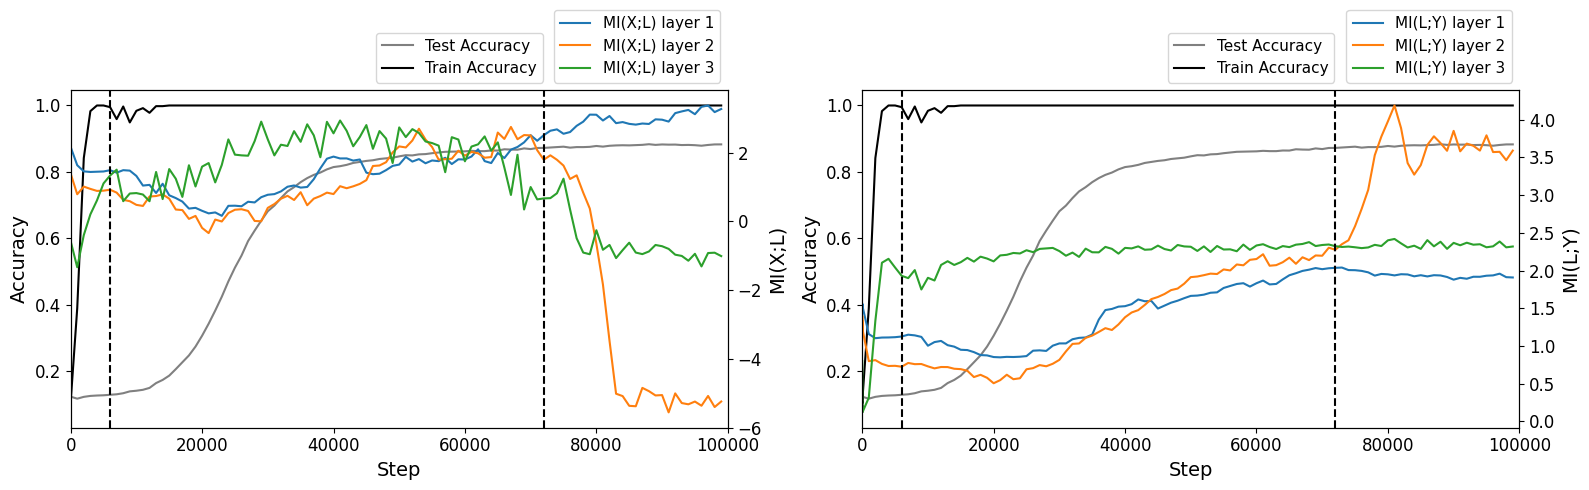

In [97]:
fig, axs2d = plt.subplots(1, 2, figsize=(16,5), )
axs_rav = np.ravel(axs2d)
vlinex_list = (6_000, 72_000)
legend_size = 11
tick_size = 12
label_size = 14
# ---------
# Accuracy
for i in range(2):
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"acc_test",
        ax=axs_rav[i],
        color='grey',
        label='Test Accuracy'
    )
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"acc_train",
        ax=axs_rav[i],
        color='black',
        label='Train Accuracy'
    )
# -----------
# MI(X;L)
ax0 = axs_rav[0].twinx()
for i in range(1,4):
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"train_mi_x_{i}",
        ax=ax0,
        label=f'MI(X;L) layer {i}'
    )
# legend
axs_rav[0].legend(loc='lower right', fontsize=legend_size, bbox_to_anchor=(0.73, 1))
ax0.legend(loc='lower right', fontsize=legend_size, bbox_to_anchor=(1, 1))
# tick
axs_rav[0].tick_params(axis='both', which='major', labelsize=tick_size)
ax0.tick_params(axis='both', which='major', labelsize=tick_size)
# label
axs_rav[0].set_xlabel("Step", fontsize=label_size)
axs_rav[0].set_ylabel("Accuracy", fontsize=label_size)
ax0.set_ylabel("MI(X;L)", fontsize=label_size)
# xlim
axs_rav[0].set_xlim(0, 100_000)
# axs_rav[0].set_xscale('log')

# -----------
# MI(L;Y)
ax1 = axs_rav[1].twinx()
for i in range(1,4):
    sns.lineplot(
        data=data, 
        x=f"step", 
        y=f"train_mi_y_{i}",
        ax=ax1,
        label=f'MI(L;Y) layer {i}'
    )
# legend
axs_rav[1].legend(loc='lower right', fontsize=legend_size, bbox_to_anchor=(0.73, 1))
ax1.legend(loc='lower right', fontsize=legend_size, bbox_to_anchor=(1, 1))
# tick
axs_rav[1].tick_params(axis='both', which='major', labelsize=tick_size)
ax1.tick_params(axis='both', which='major', labelsize=tick_size)
# label
axs_rav[1].set_xlabel("Step", fontsize=label_size)
axs_rav[1].set_ylabel("Accuracy", fontsize=label_size)
ax1.set_ylabel("MI(L;Y)", fontsize=label_size)
# xlim
axs_rav[1].set_xlim(0, 100_000)

# vertical lines
for ax_ in (ax0, ax1):
    for vlinex_ in vlinex_list:
        ax_.axvline(vlinex_, 0, 1000, c='black', linestyle='dashed')

plt.tight_layout()
plt.show()